Download all the clinical trial PDFs that are linked from the ClinicalTrials.gov database.

We save them locally using a regex to transform the URL.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
PGHOST="localhost"
PGDATABASE="aact"
PGUSER="postgres"
PGPASSWORD="postgres"

In [3]:
import psycopg2
import sys, os
import numpy as np
import pandas as pd
import pandas.io.sql as psql
import re

In [4]:
conn_string = "host="+ PGHOST +" port="+ "5432" +" dbname="+ PGDATABASE +" user=" + PGUSER \
+" password="+ PGPASSWORD

In [5]:
conn=psycopg2.connect(conn_string)


In [6]:
cursor = conn.cursor()


In [7]:
def load_data(schema, table):

    
    sql_command = "SELECT * FROM {};".format(str(table))
    print (sql_command)

    # Load the data
    
    data = pd.read_sql(sql_command, conn)

    print(data.shape)
    return (data)

In [8]:
aa = load_data("aact", "ctgov.studies")

SELECT * FROM ctgov.studies;


/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(432597, 69)


(array([46246., 50826., 30196., 28851., 30004., 55124., 43797., 57924.,
        41976., 47653.]),
 array([19294.80239514, 19295.34129548, 19295.88019583, 19296.41909617,
        19296.95799651, 19297.49689686, 19298.0357972 , 19298.57469754,
        19299.11359789, 19299.65249823, 19300.19139858]),
 <BarContainer object of 10 artists>)

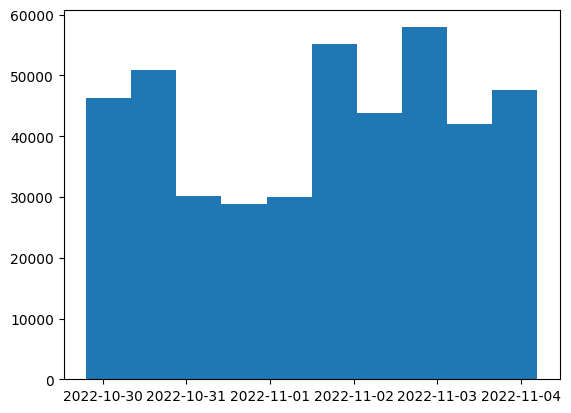

In [9]:
plt.hist(aa.created_at)

In [10]:
data = pd.read_sql("select url  from ctgov.provided_documents", conn)

/media/thomas/642d0db5-2c98-4156-b591-1a3572c5868c/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [11]:
data

,url
0,https://ClinicalTrials.gov/ProvidedDocs/56/NCT...
1,https://ClinicalTrials.gov/ProvidedDocs/33/NCT...
2,https://ClinicalTrials.gov/ProvidedDocs/36/NCT...
3,https://ClinicalTrials.gov/ProvidedDocs/12/NCT...
4,https://ClinicalTrials.gov/ProvidedDocs/61/NCT...
...,...
36593,https://ClinicalTrials.gov/ProvidedDocs/03/NCT...
36594,https://ClinicalTrials.gov/ProvidedDocs/03/NCT...
36595,https://ClinicalTrials.gov/ProvidedDocs/03/NCT...
36596,https://ClinicalTrials.gov/ProvidedDocs/03/NCT...


In [12]:
import urllib.request

Make sure we always go through the URLs in the same order and we never request the same URL twice. We don't want to do a denial of service attack on the US government.

In [13]:
urls = list(sorted(set(data.url)))

In [14]:
len(urls)

36598

In [15]:
for idx, url in enumerate(urls):
    if "Prot" not in url:
        continue
    # TODO continue from where I left off
    sanitised_url = re.sub(r'.+Docs/', '', url)
    sanitised_url = re.sub(r'/', '_', sanitised_url) 
    file_name = "raw/" + sanitised_url
    urllib.request.urlretrieve(url, file_name)
    #if idx> 10:
    #    break

KeyboardInterrupt: 

In [ ]:
conn.close()

In [ ]:
type(conn)